In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

## Dataset Sinusoid

In [11]:
path_original = "../../../data/cpps_degradation/train/samples_obs_space_train_sinusoid_20190902140748.csv"
df_original = pd.read_csv(path_original, sep=";")

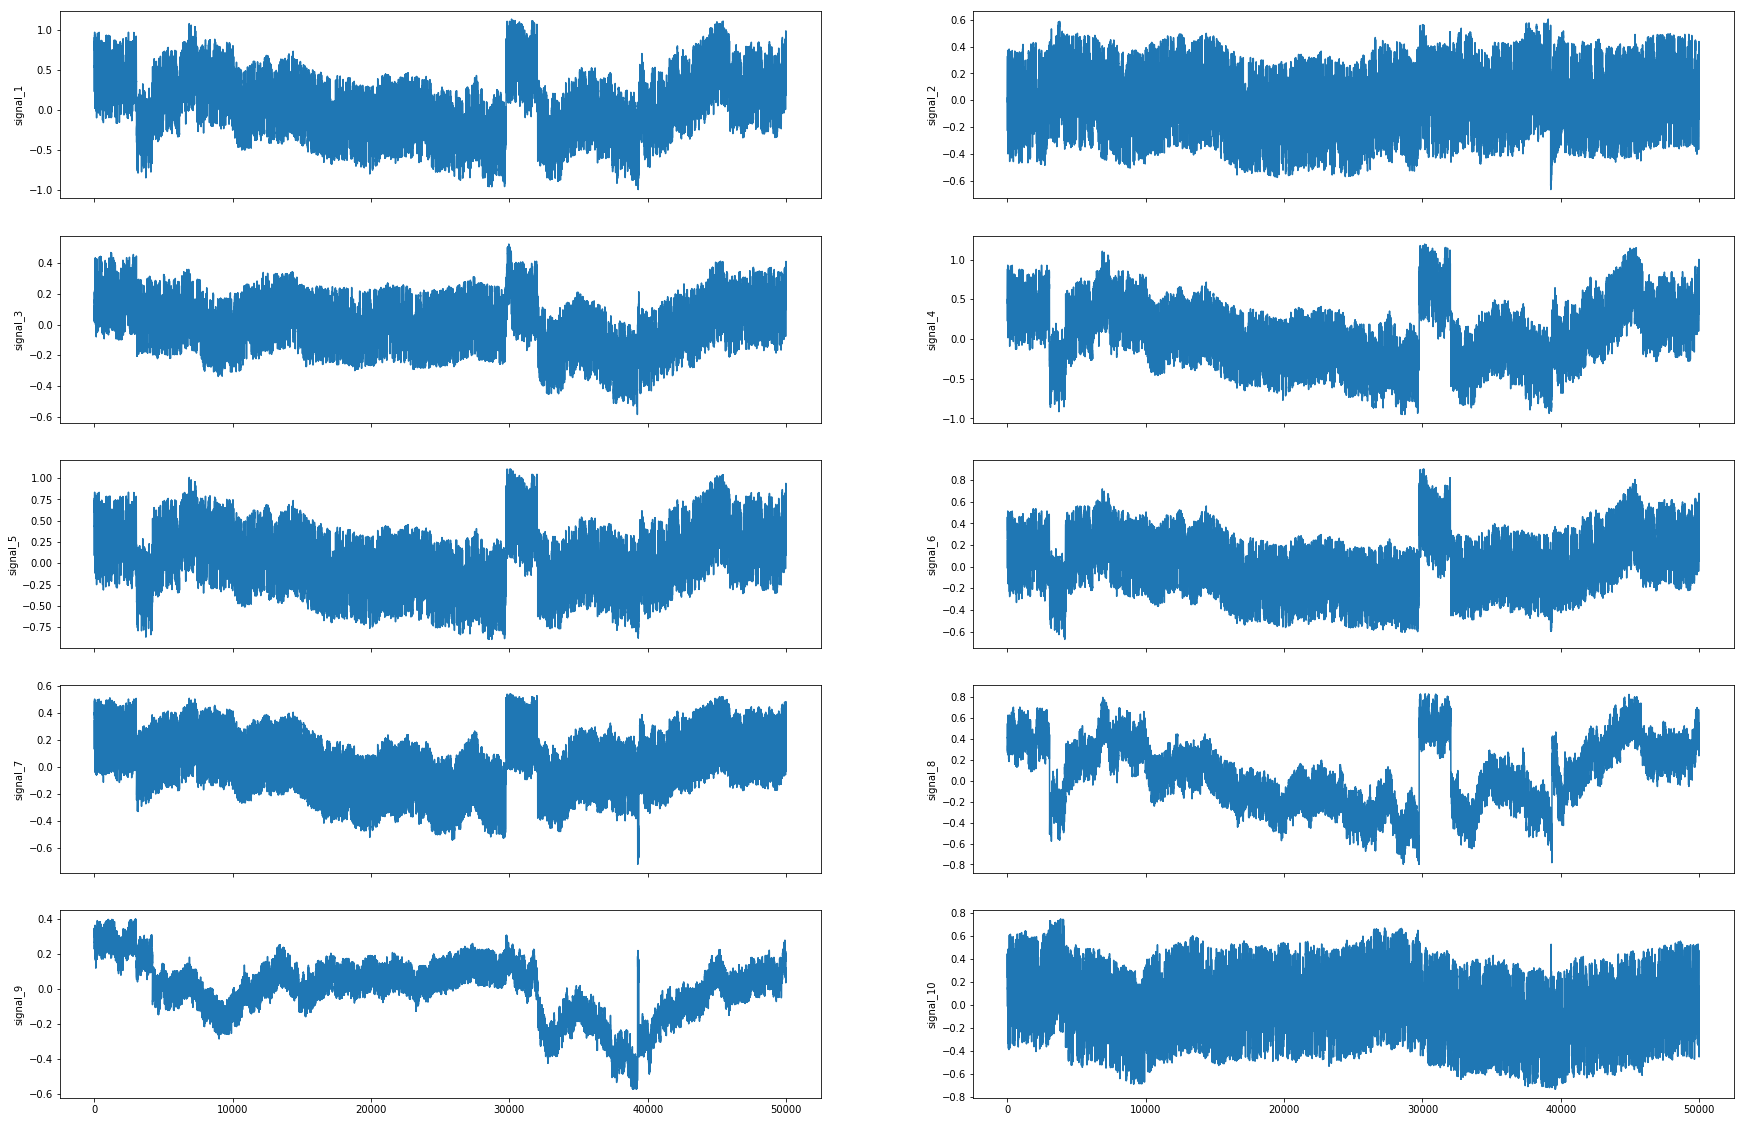

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Detailed view

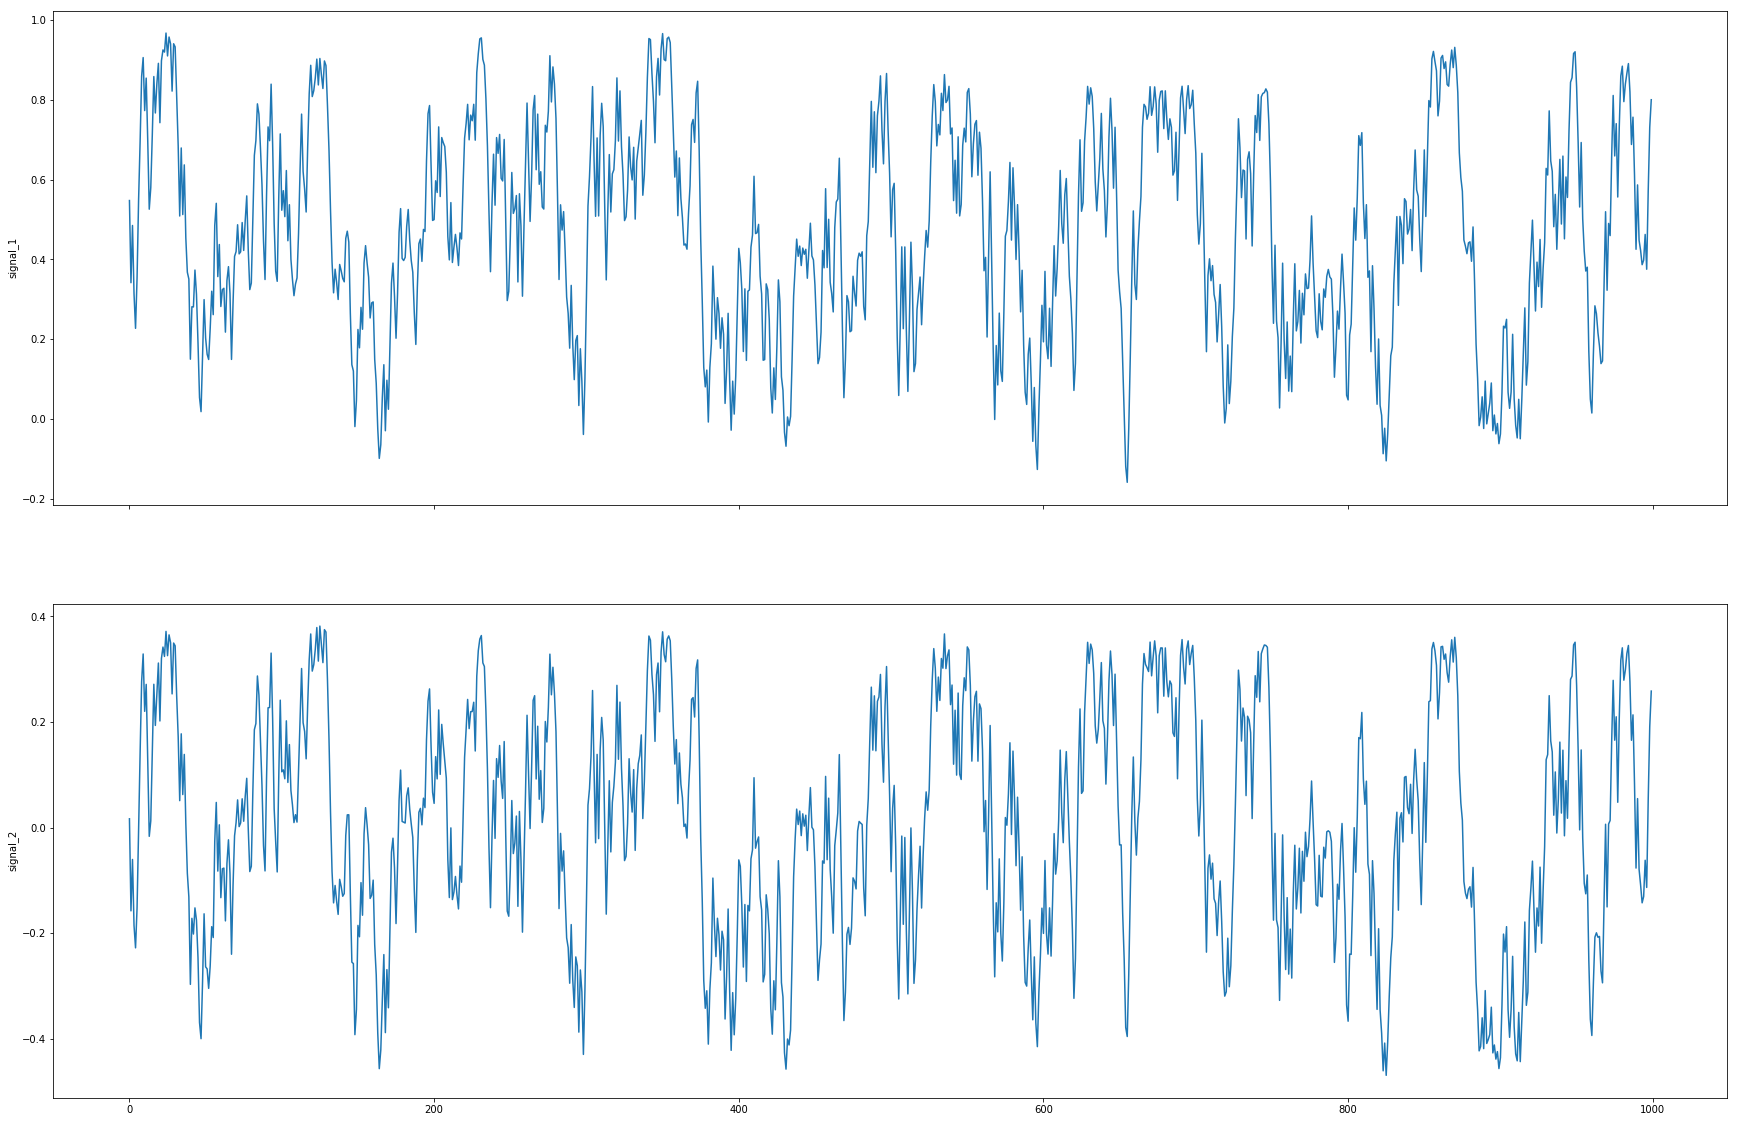

In [12]:
sub_dataset = df_original.iloc[:1000, :]
fig, axes = plt.subplots(2, 1, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,2):
    sns.lineplot(x=range(sub_dataset.shape[0]), y=sub_dataset.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Dataset Linear

In [13]:
path_original = "../../../data/cpps_degradation/train/samples_obs_space_train_linear_20190902140748.csv"
df_original = pd.read_csv(path_original, sep=";")

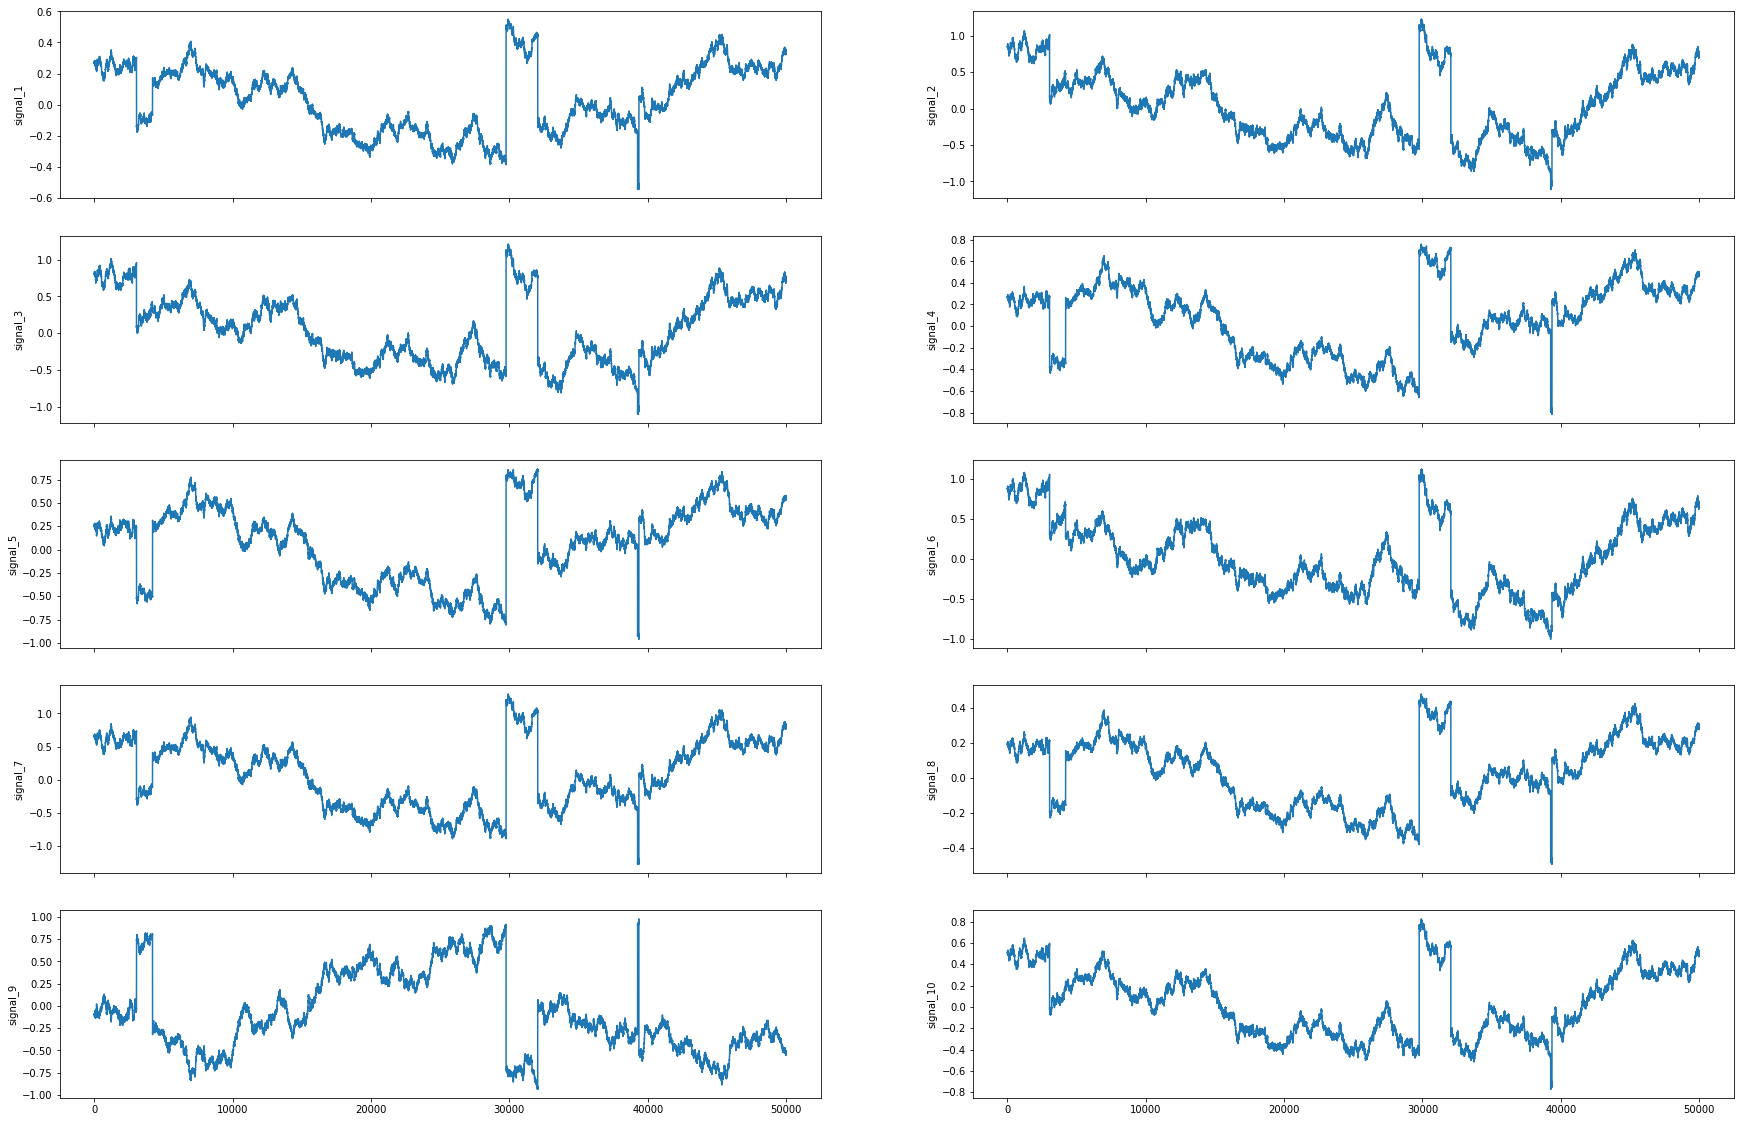

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Detailed view

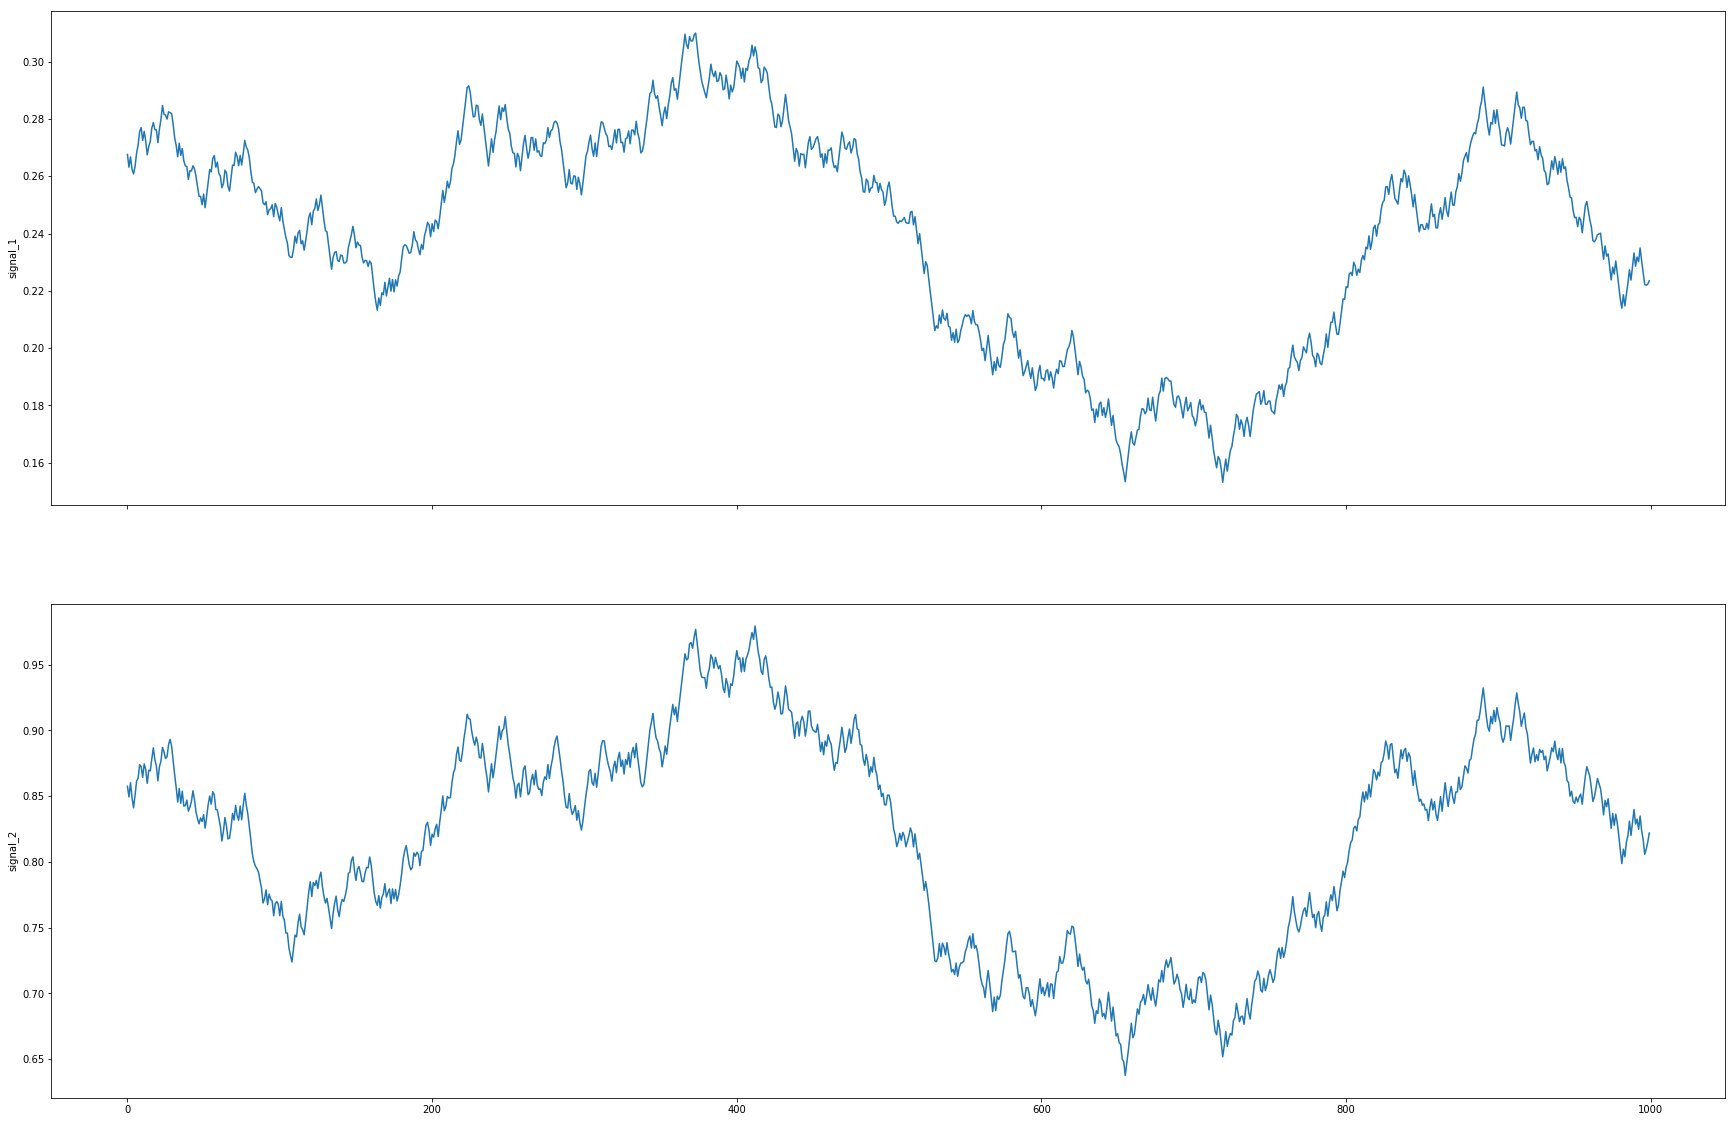

In [14]:
sub_dataset = df_original.iloc[:1000, :]
fig, axes = plt.subplots(2, 1, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,2):
    sns.lineplot(x=range(sub_dataset.shape[0]), y=sub_dataset.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Dataset Exponential

In [16]:
path_original = "../../../data/cpps_degradation/train/samples_obs_space_train_exponential_20190902140748.csv"
df_original = pd.read_csv(path_original, sep=";")

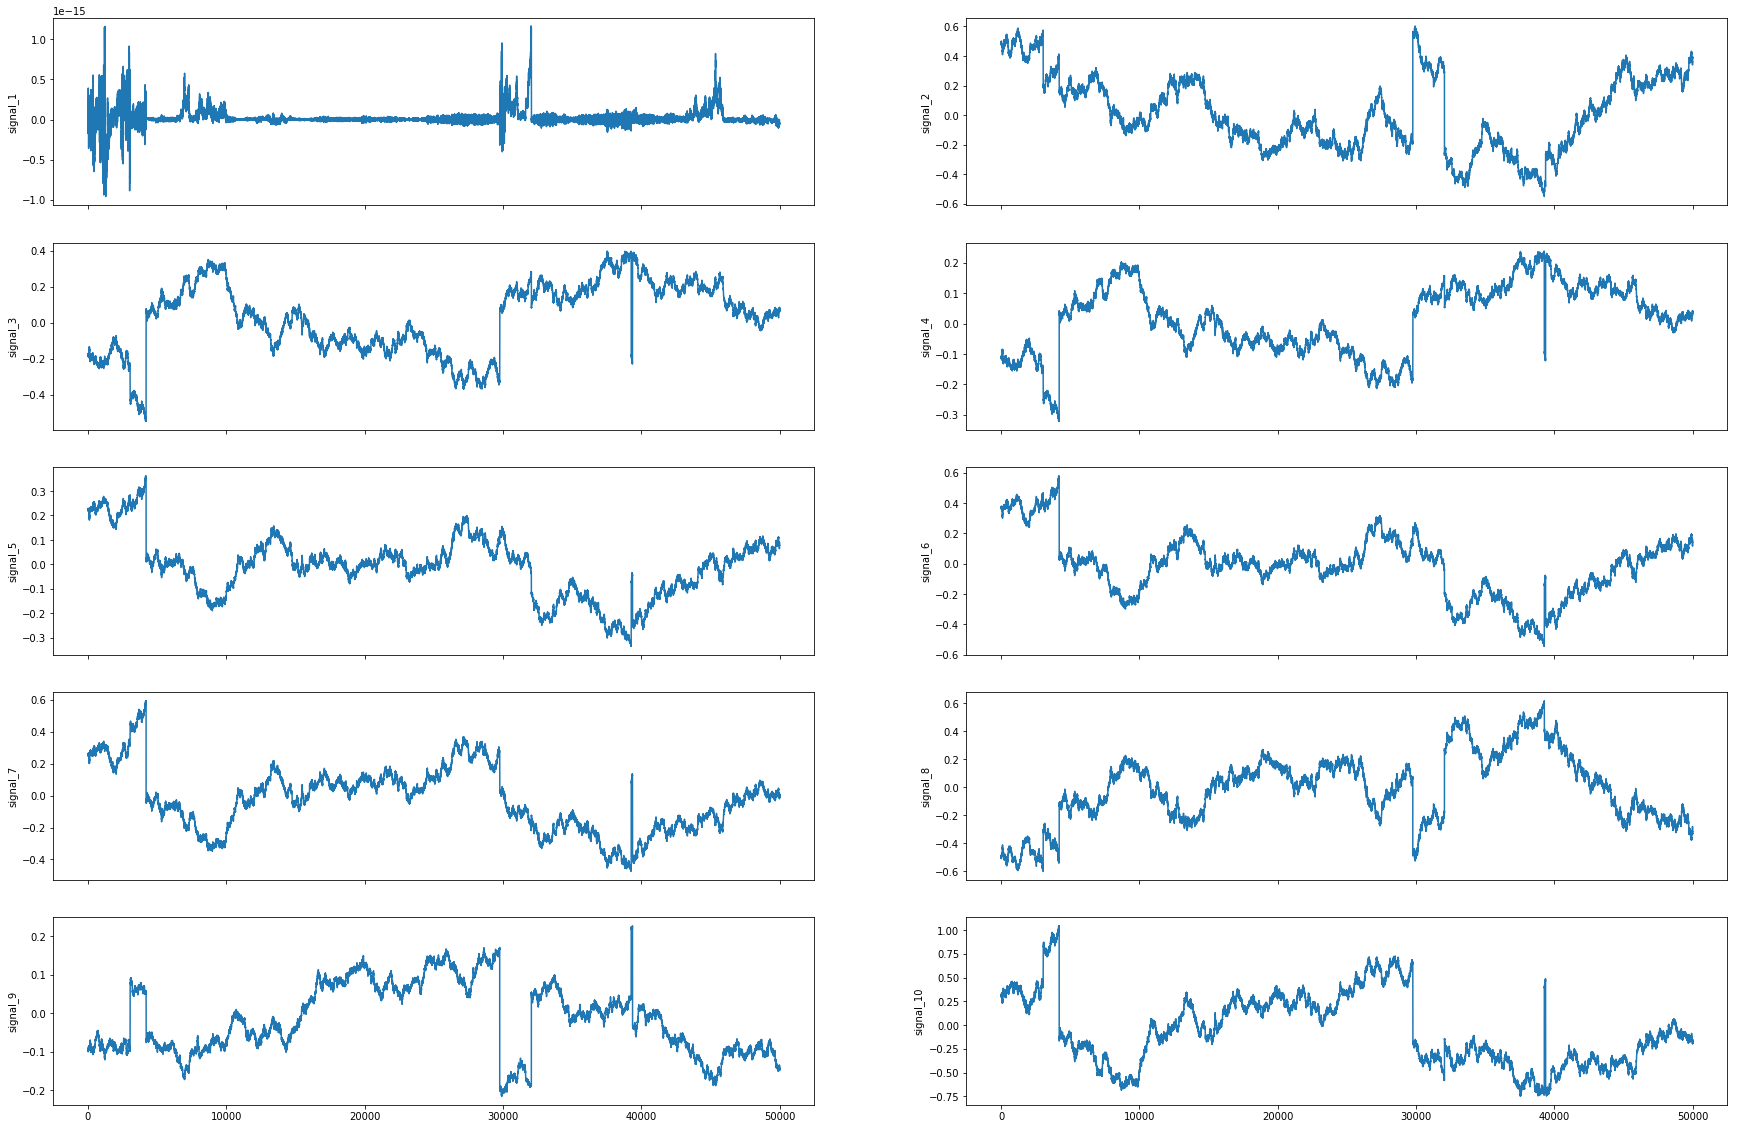

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Dataset Sinusoid - Increasing Error

In [9]:
path_original = "../../../data/cpps_degradation/test/samples_obs_space_error_sinusoid_20190902140748.csv"
df_original = pd.read_csv(path_original, sep=";")

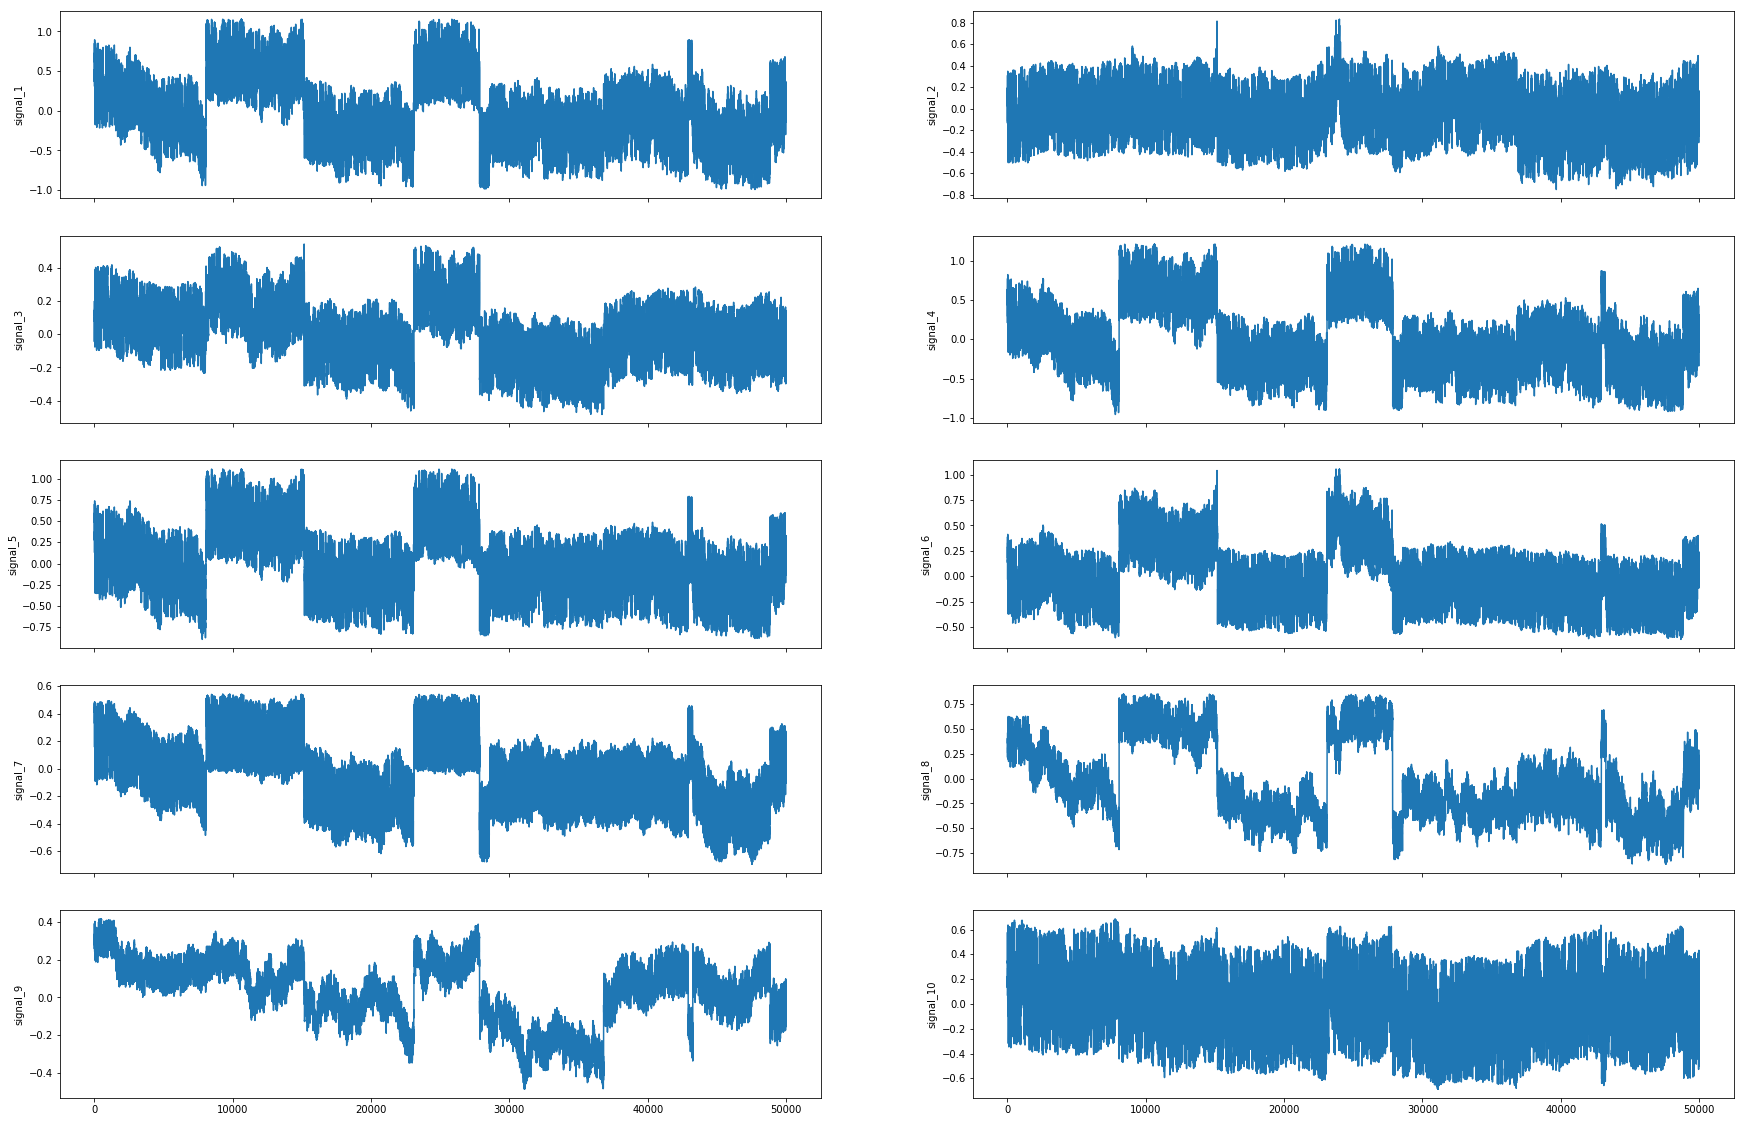

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
Following time series are non-stationary:
- cut torque
- cut position
- film position

In [15]:
for i in range(5, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for: IONGAUGEPRESSURE
p-value: 0.0
Time series is stationary
----------
Test for: ETCHBEAMVOLTAGE
p-value: 0.0
Time series is stationary
----------
Test for: ETCHBEAMCURRENT
p-value: 0.0
Time series is stationary
----------


KeyboardInterrupt: 

## Correlation of sensor time series

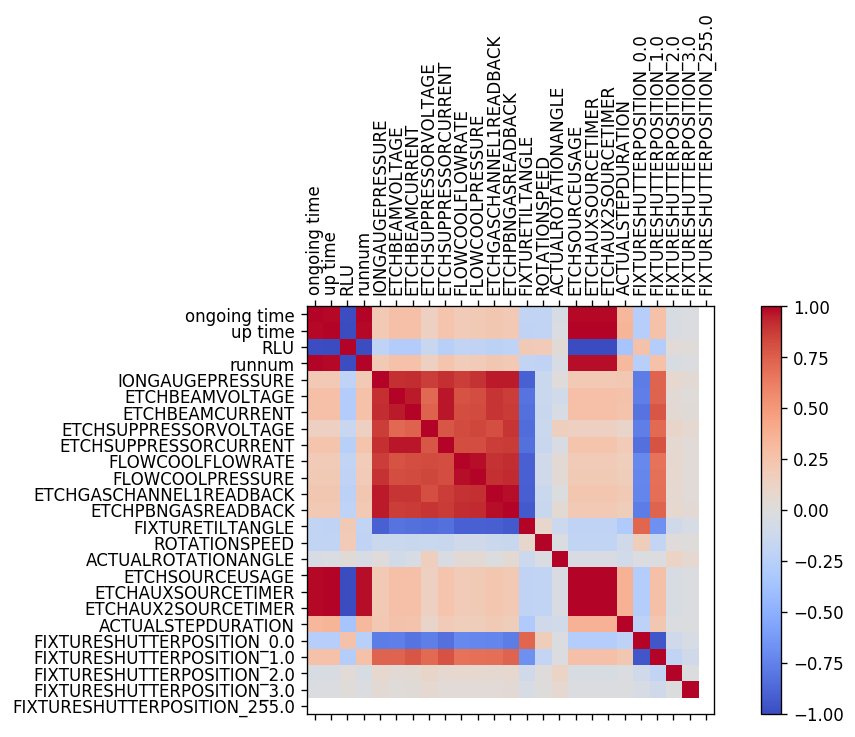

In [16]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

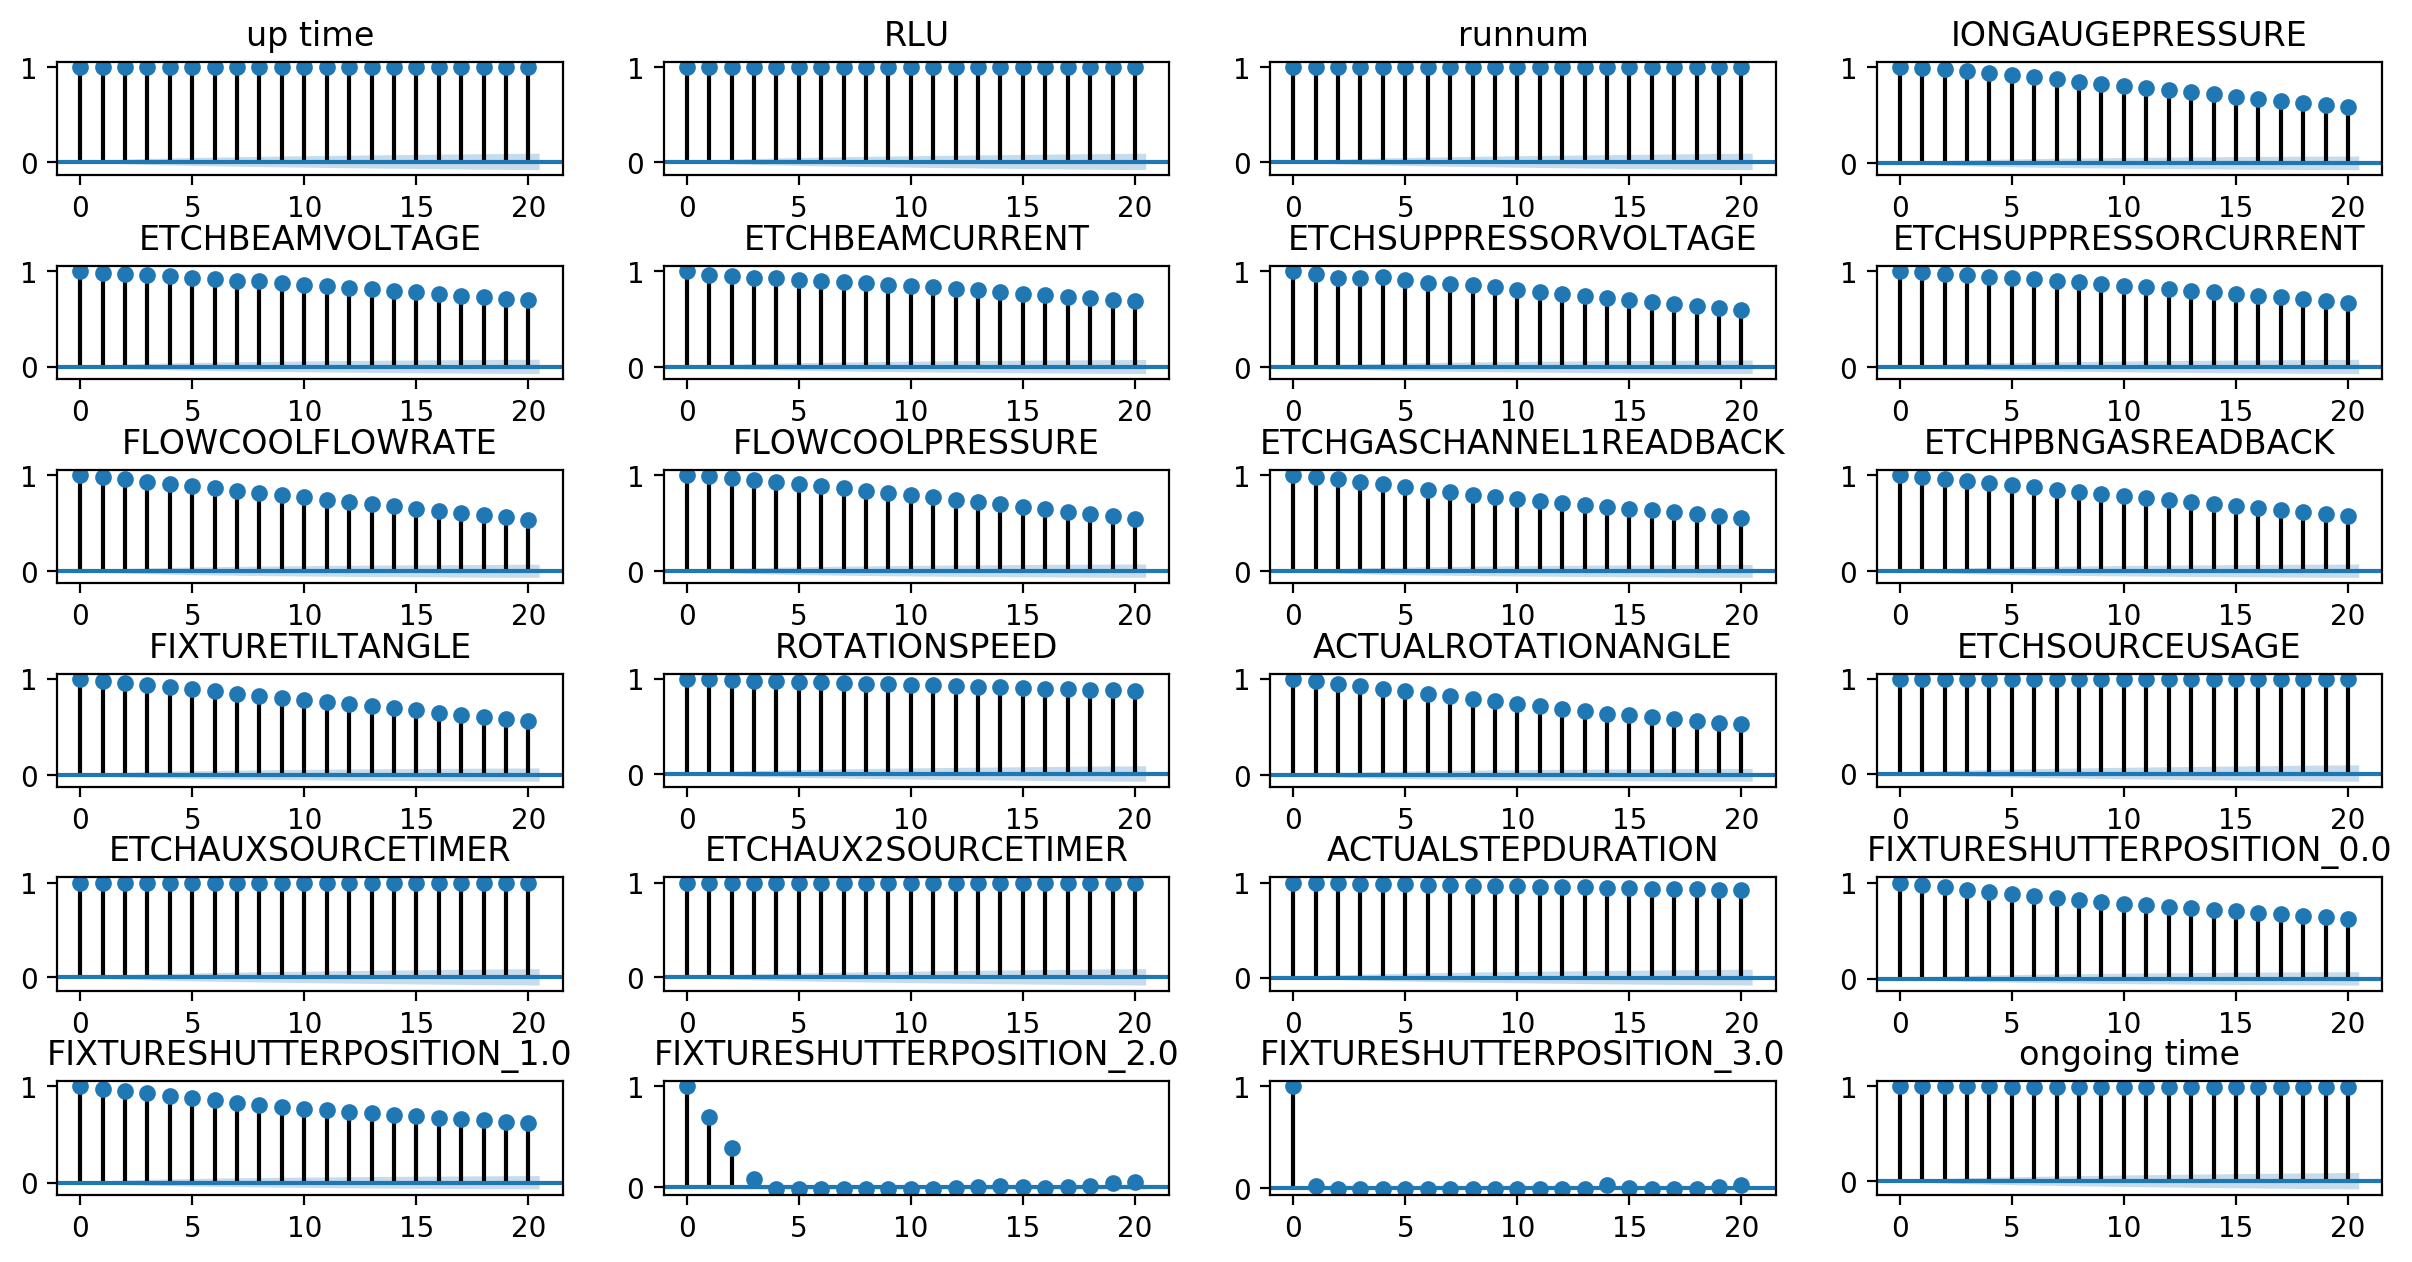

In [22]:
fig, axes = plt.subplots(6, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0,24):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i-1])
    ax[i-1].set_title(df_original.columns[i])
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

## Histogramm 

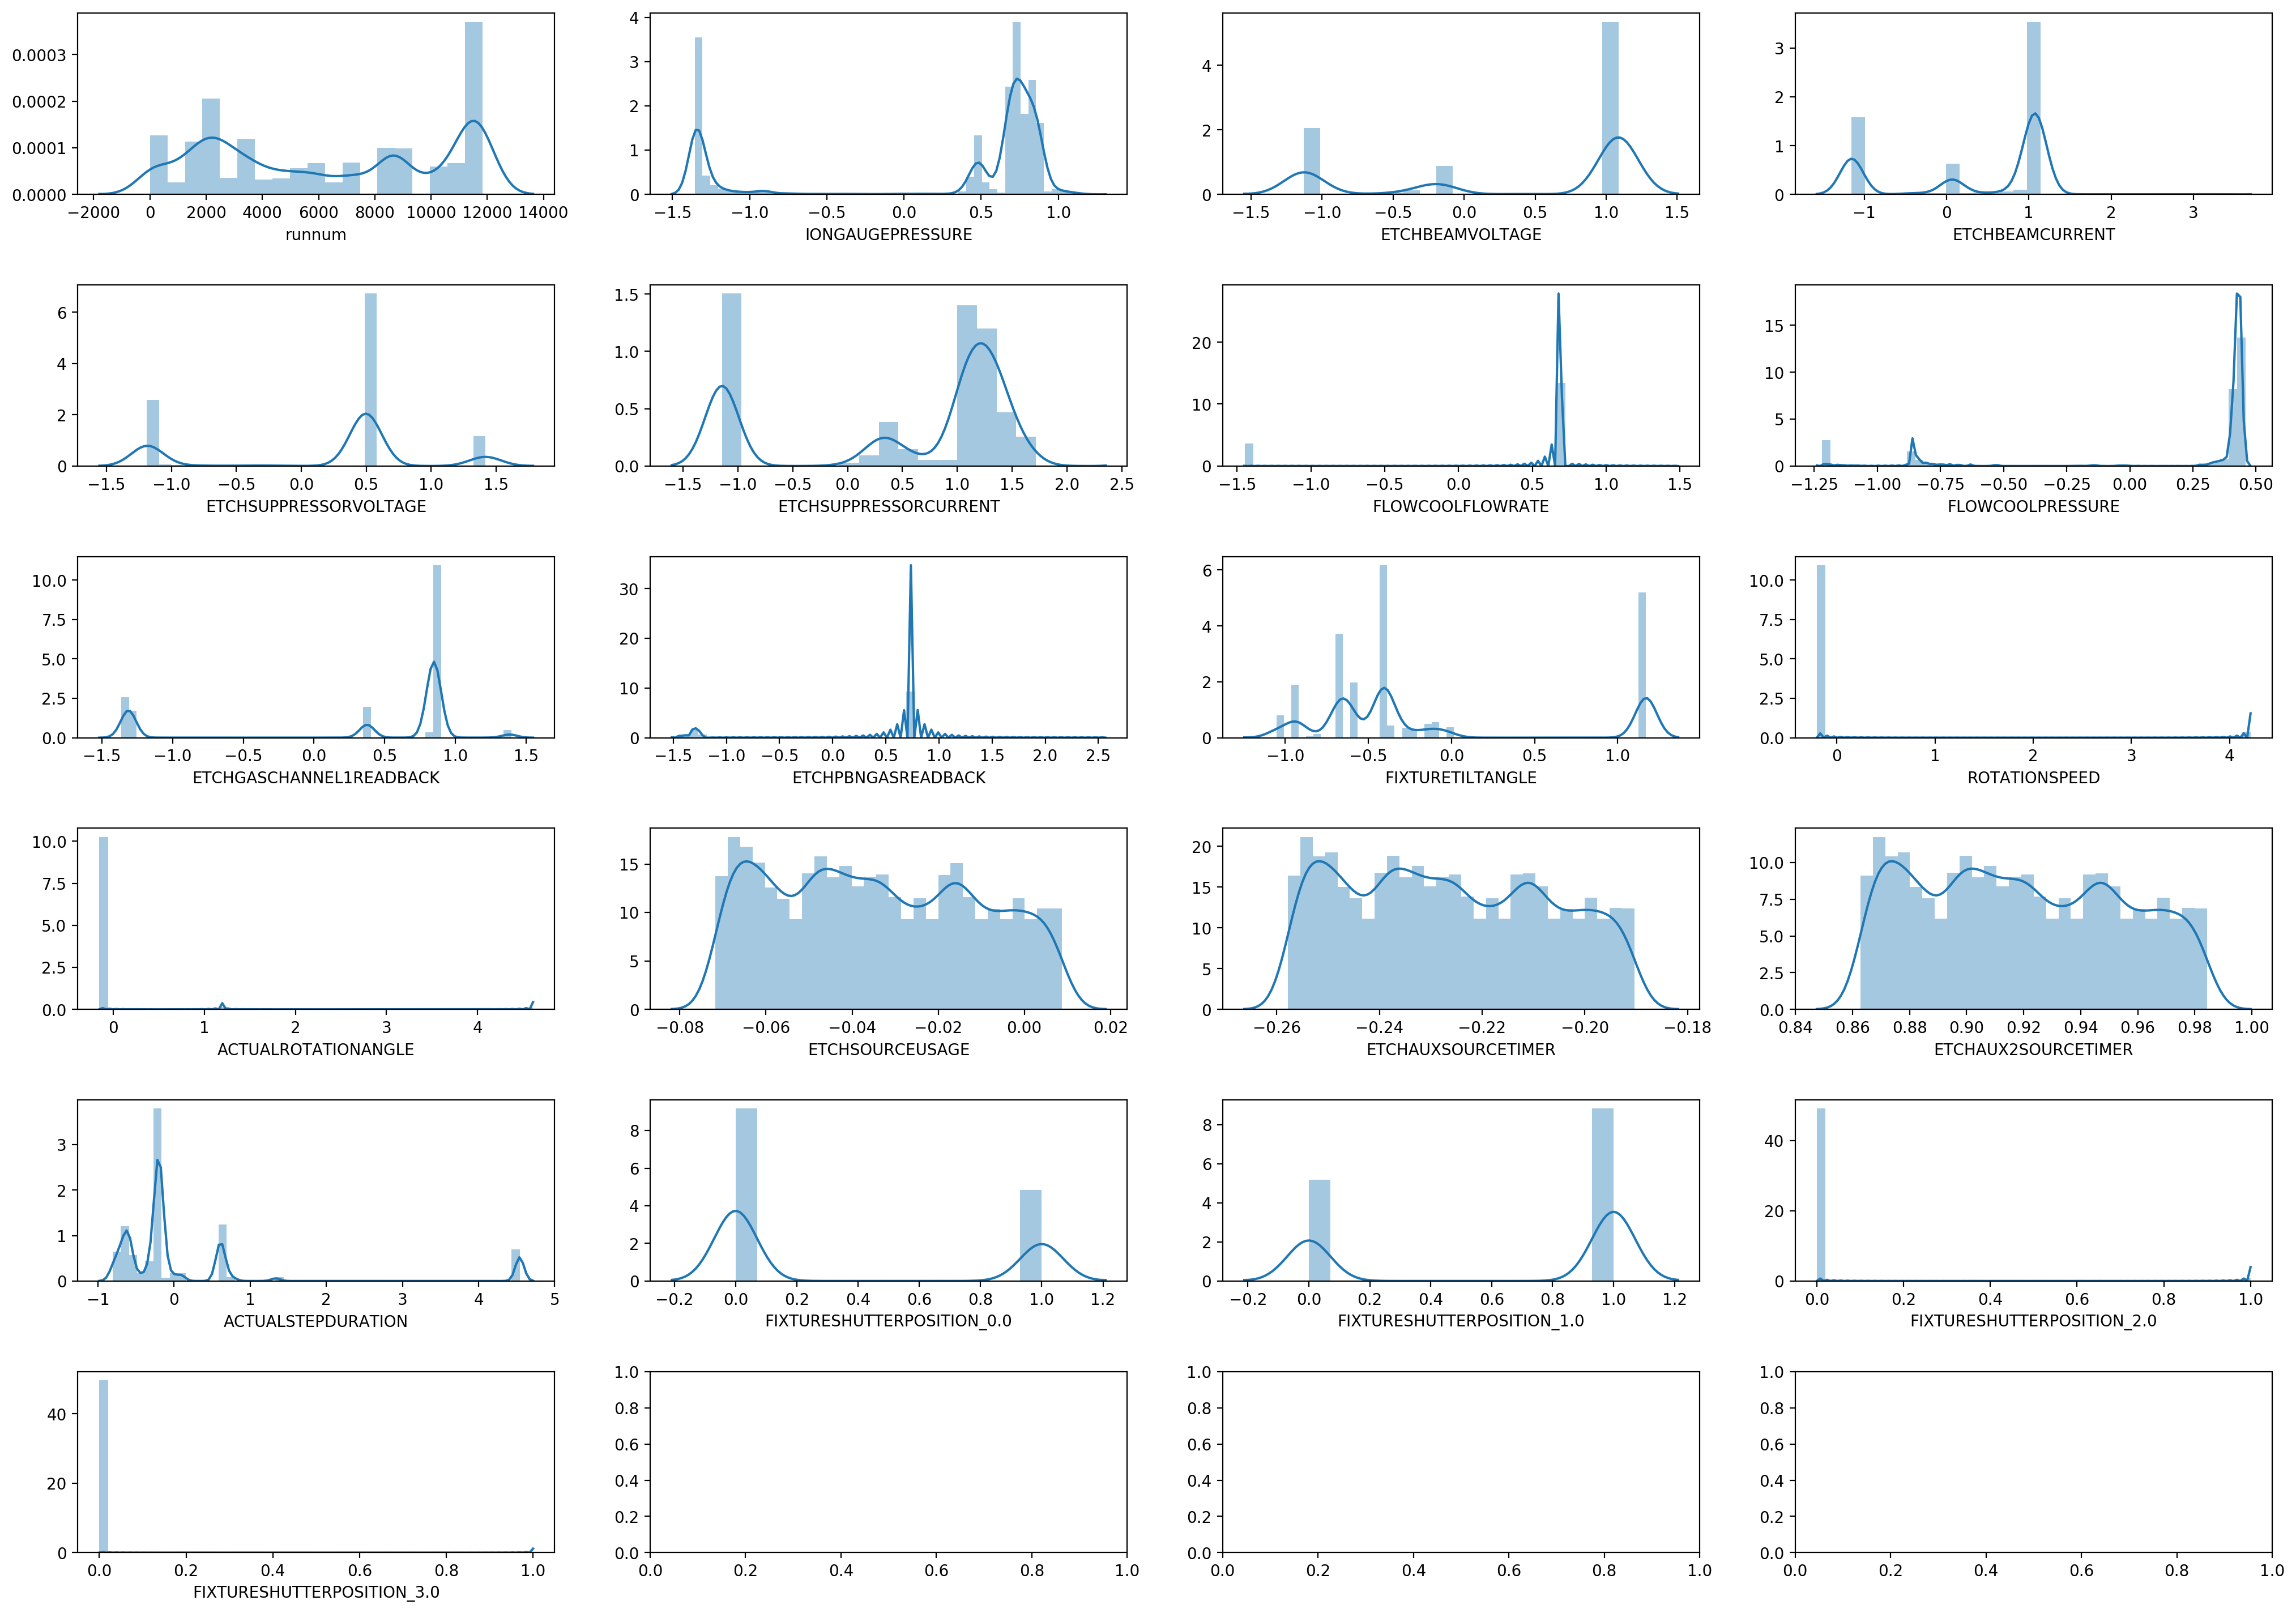

In [33]:
fig, axes = plt.subplots(6, 4, figsize=(25,18), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(3, 24):
    sns.distplot(df_original.iloc[:,i], ax=ax[i-3])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()